## Project Challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Notebook 1/2: Exploratory analysis of data_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Preparation</u>](#dataprep)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Data Cleaning and Exploratory Data Analysis</u>](#datacl)
    - [3.1: <u>Dealing with missing values and redefine variable types</u>](#clean1)
- [Part 4: <u>Insight Exploration</u>](#insights)
- [Part 5: <u>Conclusion</u>](#ending)


---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

You will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data). The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. Below is the features list that are included in the dataset.

**Features**

* **titleId**: IMDb's relational database ID for "title".
* **title**: Title of the movie.
* **rating**: MPAA (Motion Picture Association of America film rating system ) rating. 
* **region**: Region. 
* **genre**: The movie genre.
* **released**: Release date of the movie in theaters.
* **year**: Year of movie release.
* **month**: Month of movie release.
* **day**: Day of movie release.
* **score**: IMDb score.
* **director**: Director of the movie.
* **writer**: Writer of the movie.
* **star**: Main actor and actress of the movie.
* **country**: Main country of the movie.
* **budget**: Budget of the movie.
* **gross**: Gross revenue (box office) of the movie.
* **company**: Production company of the movie.
* **runtime**: Runtime of the movie in minutes. 
* **category**: Type of the credit this person ("primaryName") had for working on the movie. 
* **nconst**: IMDb's relational database ID for "primaryName".
* **primaryName**: Name of person who worked on the movie.
* **knownForTitles**: Top 4 titles an actor (indicated by "primaryName") is known for, by titleID. 

---
<a id='dataprep'></a>
## Part 2: _<u>Data Preparation</u>_

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings 
import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<a id='load'></a>
### 2.1: _<u>Load and present basic information of the dataset</u>_

In [2]:
df = pd.read_csv('Comprehensive IMDb Data.csv')
df.head().T

0  \
titleId                                       tt0081505   
title                                       The Shining   
rating                                                R   
region                                               US   
genre                                             Drama   
released                                     1980-06-13   
year                                               1980   
month                                              June   
day                                                13.0   
score                                               8.4   
director                                Stanley Kubrick   
writer                                     Stephen King   
star                                     Jack Nicholson   
country                                  United Kingdom   
budget                                       19000000.0   
gross                                        46998772.0   
company                                    Warner Bros.   
runtime                                           146.0   
category                                          actor   
nconst                                        nm0000197   
primaryName                              Jack Nicholson   
knownForTitles  tt0407887,tt0119822,tt0073486,tt0071315   

                                                      1  \
titleId                                       tt0118460   
title                                       The Shining   
rating                                                R   
region                                               US   
genre                                             Drama   
released                                     1980-06-13   
year                                               1980   
month                                              June   
day                                                13.0   
score                                               8.4   
director                                Stanley Kubrick   
writer                                     Stephen King   
star                                     Jack Nicholson   
country                                  United Kingdom   
budget                                       19000000.0   
gross                                        46998772.0   
company                                    Warner Bros.   
runtime                                           146.0   
category                                          actor   
nconst                                        nm0001836   
primaryName                                Steven Weber   
knownForTitles  tt0118460,tt0112896,tt0098948,tt0105414   

                                                      2  \
titleId                                       tt0118460   
title                                       The Shining   
rating                                                R   
region                                               US   
genre                                             Drama   
released                                     1980-06-13   
year                                               1980   
month                                              June   
day                                                13.0   
score                                               8.4   
director                                Stanley Kubrick   
writer                                     Stephen King   
star                                     Jack Nicholson   
country                                  United Kingdom   
budget                                       19000000.0   
gross                                        46998772.0   
company                                    Warner Bros.   
runtime                                           146.0   
category                                        actress   
nconst                                        nm0308371   
primaryName                              Cynthia Garris   
knownForTitles  tt0108941,tt0105428,tt01

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222569 entries, 0 to 222568
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleId         222569 non-null  object 
 1   title           222569 non-null  object 
 2   rating          221171 non-null  object 
 3   region          222569 non-null  object 
 4   genre           222569 non-null  object 
 5   released        221348 non-null  object 
 6   year            222569 non-null  int64  
 7   month           222150 non-null  object 
 8   day             221437 non-null  float64
 9   score           222569 non-null  float64
 10  director        222569 non-null  object 
 11  writer          222185 non-null  object 
 12  star            222569 non-null  object 
 13  country         222552 non-null  object 
 14  budget          163367 non-null  float64
 15  gross           222569 non-null  float64
 16  company         222225 non-null  object 
 17  runtime   

The dataset has __222569 observations and 22 features columns__. 5 of the features are of datatype floats, 1 is of type int and 16 are objects. From the Non-Null Count summary column we can see quite a few feature columns contain missing values, this will be explored more in depth in the next section. 

In [4]:
df.describe()

year            day          score        budget  \
count  222569.000000  221437.000000  222569.000000  1.633670e+05   
mean     2001.072499      16.515235       6.397761  3.389329e+07   
std        11.096449       8.657463       0.901579  3.783254e+07   
min      1980.000000       1.000000       1.900000  6.000000e+03   
25%      1992.000000       9.000000       5.800000  1.000000e+07   
50%      2002.000000      17.000000       6.400000  2.050000e+07   
75%      2011.000000      24.000000       7.000000  4.000000e+07   
max      2020.000000      31.000000       9.300000  3.560000e+08   

              gross        runtime  
count  2.225690e+05  222540.000000  
mean   7.203615e+07     107.143412  
std    1.511308e+08      17.135007  
min    3.090000e+02      63.000000  
25%    4.988181e+06      96.000000  
50%    1.976754e+07     105.000000  
75%    6.787628e+07     115.000000  
max    2.847246e+09     366.000000

As we can see the value range varies extensively across the features, which could be an indication that we should probably standardise the data for later predictive tasks.  

<a id='profiler'></a>
### 2.2: _<u>Dicussion of profiler output</u>_

__Now let's take a deeper dive into the data by presenting the pandas profiler output__

In [5]:
## create pandas profiler output 
profile = ProfileReport(df, title="The IMDb Movie dataset", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


First of all, in the Overview section we can see that there are 64146 missing values in total, which accounts for 1.3% of the observations in the dataset. And there are 6 duplicate rows. As for the variables, we have 16 that are categorical, 6 numeric. Below is a more detialed list of the feature types: 

**Features**

* **titleId**: Categorical - _Discrete and Nominal_
* **title**: Categorical - _Discrete and Nominal_ 
* **rating**: Categorical - _Discrete and Ordinal_  
* **region**: Categorical - _Discrete and Nominal_
* **genre**: Categorical - _Discrete and Nominal_
* **released**: Categorical - _Discrete and Ordinal_
* **year**: Numeric - _Continuous and Interval_ 
* **month**: Categorical - _Discrete and Ordinal_
* **day**: Numeric - _Continuous and Interval_
* **score**: Numeric - _Continuous and Ratio_ 
* **director**: Categorical - _Discrete and Nominal_
* **writer**: Categorical - _Discrete and Nominal_ 
* **star**: Categorical - _Discrete and Nominal_ 
* **country**: Categorical - _Discrete and Nominal_ 
* **budget**: Numeric - _Continuous and Ratio_ 
* **gross**: Numeric - _Continuous and Ratio_ 
* **company**: Categorical - _Discrete and Nominal_ 
* **runtime**: Numeric - _Continuous and Ratio_  
* **category**: Categorical - _Discrete and Nominal_ 
* **nconst**: Categorical - _Discrete and Nominal_
* **primaryName**: Categorical - _Discrete and Nominal_
* **knownForTitles**: Categorical - _Discrete and Nominal_

However, the default type of the feature variables such as "released" and "month" could be changed to numeric - _Continuous and Interval_. The reason for this is that they both contain quantative information and the distance between the values can be measured. 

Secondly, the specific missing values for each variable are summarized below: 

| Features | Missing (Count) | Missing (%) |
|----------|-----------------|-------------|
| Rating   | 1398            | 0.6%        |
| Released | 1221            | 0.5%        |
| Month    | 419             | 0.2%        |
| Day      | 1132            | 0.5%        |
| Writer   | 384             | 0.2%        |
| Country  | 17              | <0.1%       |
| Buget    | 59202           | 26.6%       |
| Company  | 344             | 0.2%        |
| Runtime  | 29              | <0.1%       |

As we can see that except for budget, the rest of the features only contains minimal missing values that are less than 1%. These could be dealt with by for example filling in values that are most common for "country", taking the mean of the values for "runtime" etc. The feature "budget" needs further exploration. 

---

<a id='datacl'></a>
## Part 3: _<u>Data Cleaning and Exploratory Data Analysis</u>_



As we can see from the summary of missing values table that Budget, which is a key variable for our prediction task have great amount of missing values. However the original dataset contains one obervation per unique value of the variables: primaryName, category, nconst and KnownForTiles of a movie, resulting many rows with the repeated information in the other variables. Since our main focus will be the individual movies, in order to have a better overview of their information we construct a more compact dataframe such that we have one movie per row, and the each movie is described by the following attributes:

The variables we made changes to:

* **index**: Title of the movie.
* **category**: Dictionary with primary names as keys and the corresponding role of the persons (primaryName) as values. e.g. {'Jason Mewes': 'actor', 'Robert Holtzman': 'producer', ... }
* **nconst**: Dictionary with primary names as keys and the corresponding ID of the persons (primaryName) as values. e.g. {'Jason Mewes': 'nm0582939','Robert Holtzman': 'nm0392692', ... }
* **primaryName**: *Removed*
* **knownForTitles**: Dictionary with primary names as keys and the corresponding Top 4 titles of the persons (primaryName) as values. e.g. {'Jason Mewes': 'tt0120655,tt0109445,tt0261392,tt0424345','Robert Holtzman': 'tt0368447,tt0114746,tt0167404,tt0217869', ...}

The ones that are kept the same:
* **titleId**: IMDb's relational database ID for "title".
* **rating**: MPAA (Motion Picture Association of America film rating system ) rating. 
* **region**: Region. 
* **genre**: The movie genre.
* **released**: Release date of the movie in theaters.
* **year**: Year of movie release.
* **month**: Month of movie release.
* **day**: Day of movie release.
* **score**: IMDb score.
* **director**: Director of the movie.
* **writer**: Writer of the movie.
* **star**: Main actor and actress of the movie.
* **country**: Main country of the movie.
* **budget**: Budget of the movie.
* **gross**: Gross revenue (box office) of the movie.
* **company**: Production company of the movie.
* **runtime**: Runtime of the movie in minutes. 


In [6]:
## extract list of unique movie titles 
titles=list(set(df['title']))

# Create a dataframe where each row is a unique movie 
movies={}
for t in titles:
    cat = {}
    ncon = {}
    prim = {}
    known = {}
    temp = {}
    a = True
    for index, row in df[df.title == t].iterrows():
        if a:
            temp = dict(row.iloc[np.r_[0,2:18]])
            a = False
        pN = row['primaryName']
        cat[pN] = row['category']
        ncon[pN] = row['nconst']
        known[pN] = row['knownForTitles']
    char_dict = {'category': cat, 'nconst': ncon, 'knownForTitles': known}    
    movie = {**temp, **char_dict}
    #movie=np.array(df[df.title==t])
    movies[t]=movie

In [7]:
d=pd.DataFrame(movies)
df_movies=d.transpose()
df_movies = df_movies.astype({"score":float,"budget":float, "gross":float,"runtime":float})
df_movies.head()

titleId rating region      genre    released  year  \
The Wolf of Wall Street  tt0020596      R     US  Biography  2013-12-25  2013   
K2                       tt0102178      R     US  Adventure  1991-05-01  1991   
Rough Night              tt4799050      R     US     Comedy  2017-06-16  2017   
Hearts in Atlantis       tt0252501  PG-13     US      Drama  2001-09-28  2001   
Vampires                 tt7466102      R     US     Action  1998-10-30  1998   

                             month   day  score         director  \
The Wolf of Wall Street   December  25.0    8.2  Martin Scorsese   
K2                             May   1.0    6.2     Franc Roddam   
Rough Night                   June  16.0    5.2    Lucia Aniello   
Hearts in Atlantis       September  28.0    6.9      Scott Hicks   
Vampires                   October  30.0    6.1   John Carpenter   

                                 writer                star         country  \
The Wolf of Wall Street  Terence Winter   Leonardo DiCaprio   United States   
K2                       Patrick Meyers       Michael Biehn  United Kingdom   
Rough Night               Lucia Aniello  Scarlett Johansson   United States   
Hearts in Atlantis         Stephen King     Anthony Hopkins   United States   
Vampires                  John Steakley         James Woods           Japan   

                              budget        gross                    company  \
The Wolf of Wall Street  100000000.0  392000694.0       Red Granite Pictures   
K2                               NaN    3106559.0         Paramount Pictures   
Rough Night               20000000.0   47347283.0        Paulilu Productions   
Hearts in Atlantis        31000000.0   30919415.0  Castle Rock Entertainment   
Vampires                  20000000.0   20308772.0        Largo Entertainment   

                         runtime  \
The Wolf of Wall Street    180.0   
K2                         104.0   
Rough Night                101.0   
Hearts in Atlantis         101.0   
Vampires                   108.0   

                                                                  category  \
The Wolf of Wall Street  {'Nancy Carroll': 'actress', 'Riza Aziz': 'pro...   
K2                       {'Patrick Meyers': 'writer', 'Franc Roddam': '...   
Rough Night              {'Zoë Kravitz': 'actress', 'Lou Perez': 'actor...   
Hearts in Atlantis       {'Hope Davis': 'actress', 'Anthony Hopkins': '...   
Vampires                 {'Shyla Jennings': 'actress', 'Juliette Cardin...   

                                                                    nconst  \
The Wolf of Wall Street  {'Nancy Carroll': 'nm0007216', 'Riza Aziz': 'n...   
K2                       {'Patrick Meyers': 'nm0583604', 'Franc Roddam'...   
Rough Night              {'Zoë Kravitz': 'nm2368789', 'Lou Perez': 'nm2...   
Hearts in Atlantis       {'Hope Davis': 'nm0204706', 'Anthony Hopkins':...   
Vampires                 {'Shyla Jennings': 'nm3744960', 'Juliette Card...   

                                                            knownForTitles  
The Wolf of Wall Street  {'Nancy Carroll': 'tt0030856,tt0026514,tt00242...  
K2                       {'Patrick Meyers': 'tt0102178', 'Franc Roddam'...  
Rough Night              {'Zoë Kravitz': 'tt4116284,tt1840309,tt1270798...  
Hearts in Atlantis       {'Hope Davis': 'tt0257360,tt0305206,tt0383028,...  
Vampires                 {'Shyla Jennings': 'tt7466102,tt3026476,tt2166...

In [8]:
sum(df_movies.budget.isna())/len(df_movies) * 100

27.04375967356128

<a id='clean1'></a>
### 3.1: _<u>Dealing with missing values and redefine variable types</u>_

As we can see from the profiler output, there is still 27% of data missing for the budget column, we will drop them as they make up largest proportion of missing data in our dataset which are hard to estimate with what we currently have. Also, we will drop the missing values from the released column as that will also remove the missing data from month and day column. 

In [9]:
df2 = df_movies.dropna(subset=['budget','released'])

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, The Wolf of Wall Street to The Wild
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titleId         5171 non-null   object 
 1   rating          5161 non-null   object 
 2   region          5171 non-null   object 
 3   genre           5171 non-null   object 
 4   released        5171 non-null   object 
 5   year            5171 non-null   object 
 6   month           5171 non-null   object 
 7   day             5171 non-null   object 
 8   score           5171 non-null   float64
 9   director        5171 non-null   object 
 10  writer          5171 non-null   object 
 11  star            5171 non-null   object 
 12  country         5170 non-null   object 
 13  budget          5171 non-null   float64
 14  gross           5171 non-null   float64
 15  company         5169 non-null   object 
 16  runtime         5170 non-null   float64
 17  category    

In [11]:
profile_movies = ProfileReport(df2, title="The IMDb Movie dataset", html={'style': {'full_width': True}})
profile_movies.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


Below is the new table of missing values after dropping observations with no budget information. 

| Features | Missing (Count) | Missing (%) |
|----------|-----------------|-------------|
| Rating   | 10              | 0.2%        |
| Country  | 1               | <0.1%       |
| Company  | 2               | <0.1%       |
| Runtime  | 1               | <0.1%       |

To handle these missing values we will:

- Rating, Country and Company: fill in the with the most common value
- Runtime: fill in with the median value 

In [12]:
df2.fillna({'rating':df2.rating.mode().astype(str)[0],'country':df2.country.mode().astype(str)[0],
'company':df2.company.mode().astype(str)[0],'runtime':df2.runtime.median()},inplace=True)

In [13]:
np.sum(df2.isna())

titleId           0
rating            0
region            0
genre             0
released          0
year              0
month             0
day               0
score             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
category          0
nconst            0
knownForTitles    0
dtype: int64

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, The Wolf of Wall Street to The Wild
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titleId         5171 non-null   object 
 1   rating          5171 non-null   object 
 2   region          5171 non-null   object 
 3   genre           5171 non-null   object 
 4   released        5171 non-null   object 
 5   year            5171 non-null   object 
 6   month           5171 non-null   object 
 7   day             5171 non-null   object 
 8   score           5171 non-null   float64
 9   director        5171 non-null   object 
 10  writer          5171 non-null   object 
 11  star            5171 non-null   object 
 12  country         5171 non-null   object 
 13  budget          5171 non-null   float64
 14  gross           5171 non-null   float64
 15  company         5171 non-null   object 
 16  runtime         5171 non-null   float64
 17  category    

Next we will redefine column data types where we will convert released as Datetime object, month as Categorical object. And we will also order the dataset by release date. 


In [59]:
df2['released'] = pd.to_datetime(df2['released'],format='%Y-%m-%d')

In [81]:
df2 = df2.sort_values(by= ['released'])

In [89]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2['months'] = pd.Categorical(df2['month'], categories=months, ordered=True)

---
<a id='insights'></a>
## Part 4: _<u>Insight Exploration</u>_


###  Score visualisation 

show distribution of the scores

<AxesSubplot:xlabel='score', ylabel='Count'>

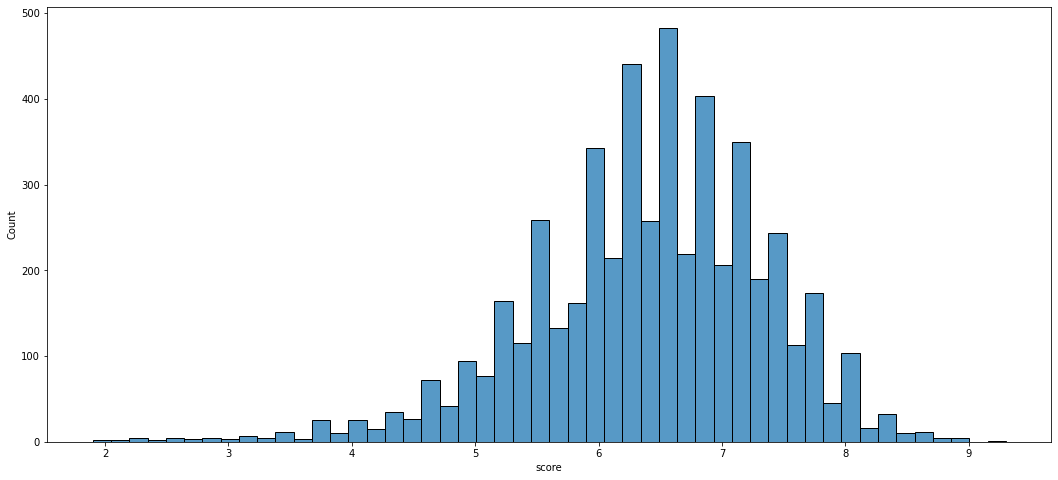

In [14]:
import seaborn as sns 
plt.rcParams['figure.figsize'] = (18, 8)
sns.histplot(data=df2, x="score")

show movies that received top scores 

In [15]:
df2.sort_values('score', ascending= False).score[:10]

The Shawshank Redemption                             9.3
The Dark Knight                                      9.0
Schindler's List                                     8.9
The Lord of the Rings: The Return of the King        8.9
Pulp Fiction                                         8.9
Forrest Gump                                         8.8
Inception                                            8.8
Fight Club                                           8.8
The Lord of the Rings: The Fellowship of the Ring    8.8
Goodfellas                                           8.7
Name: score, dtype: float64

### Gross visualisation

Show distribution of gross for movies

<AxesSubplot:xlabel='gross', ylabel='Count'>

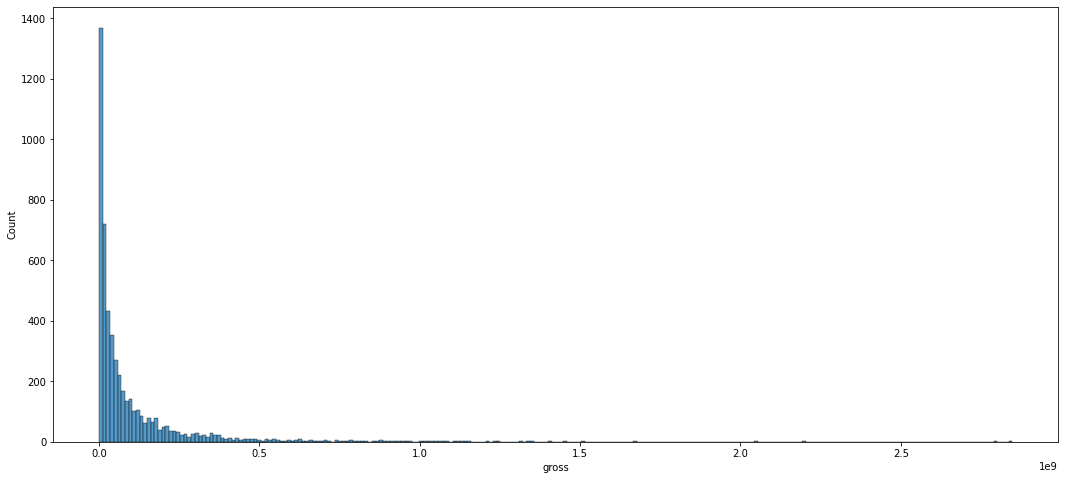

In [16]:
sns.histplot(data=df2, x="gross")

In [17]:
df2.sort_values('gross', ascending= False).gross[:10]

Avatar                                          2.847246e+09
Avengers: Endgame                               2.797501e+09
Titanic                                         2.201647e+09
Avengers: Infinity War                          2.048360e+09
Jurassic World                                  1.670516e+09
Furious 7                                       1.515341e+09
Frozen II                                       1.450027e+09
Avengers: Age of Ultron                         1.402810e+09
Black Panther                                   1.347598e+09
Harry Potter and the Deathly Hallows: Part 2    1.342322e+09
Name: gross, dtype: float64

Relationship between score and gross

<AxesSubplot:xlabel='gross', ylabel='score'>

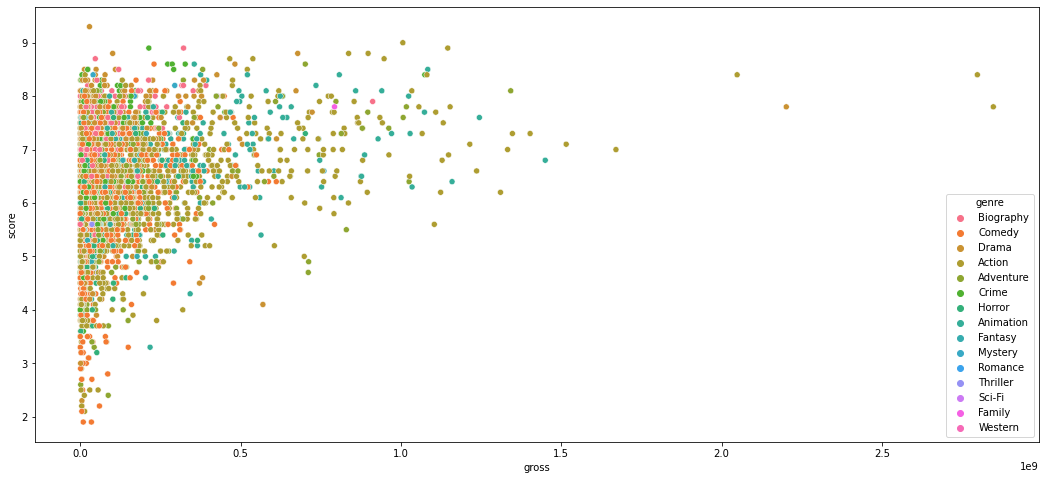

In [18]:
sns.scatterplot(data=df2, x="gross", y="score", hue="genre")

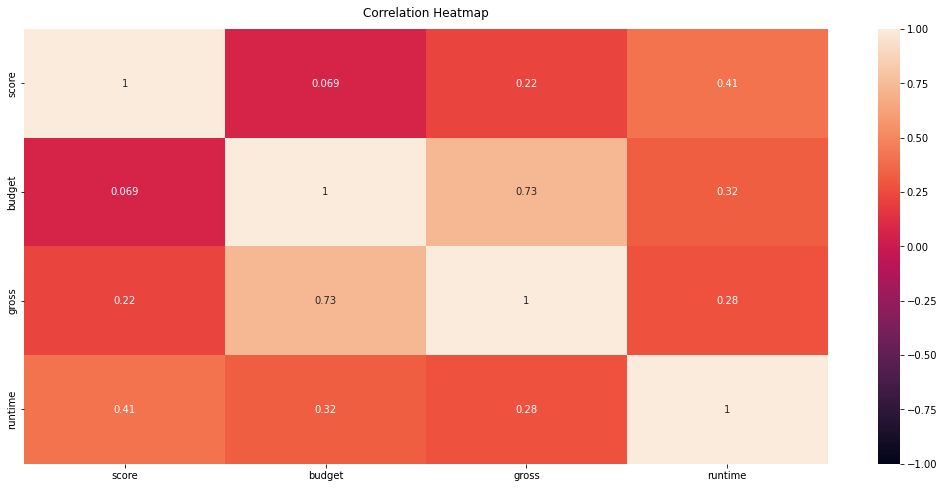

In [19]:
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Show distribution of genres

<AxesSubplot:xlabel='genre', ylabel='Count'>

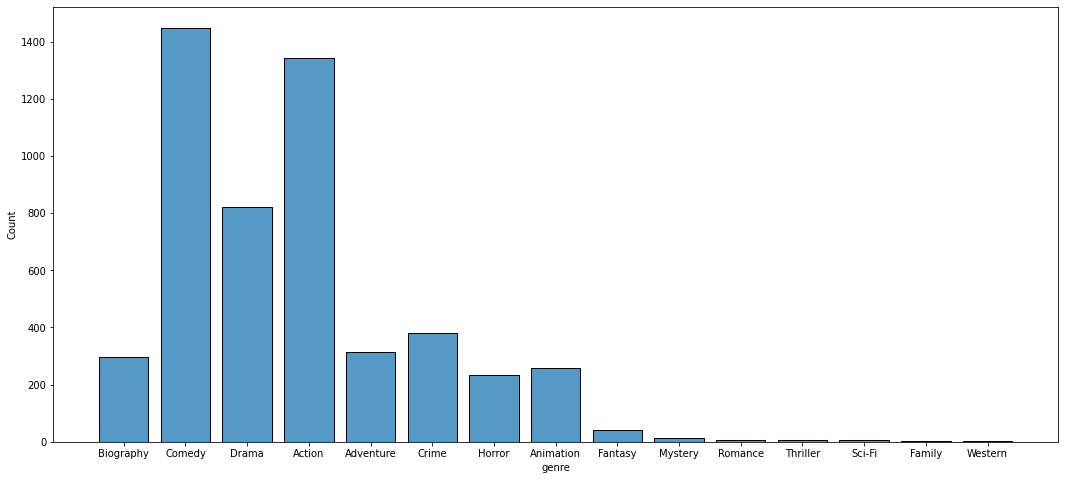

In [20]:
sns.histplot(data=df2, x="genre",shrink=.8)

<AxesSubplot:xlabel='gross', ylabel='genre'>

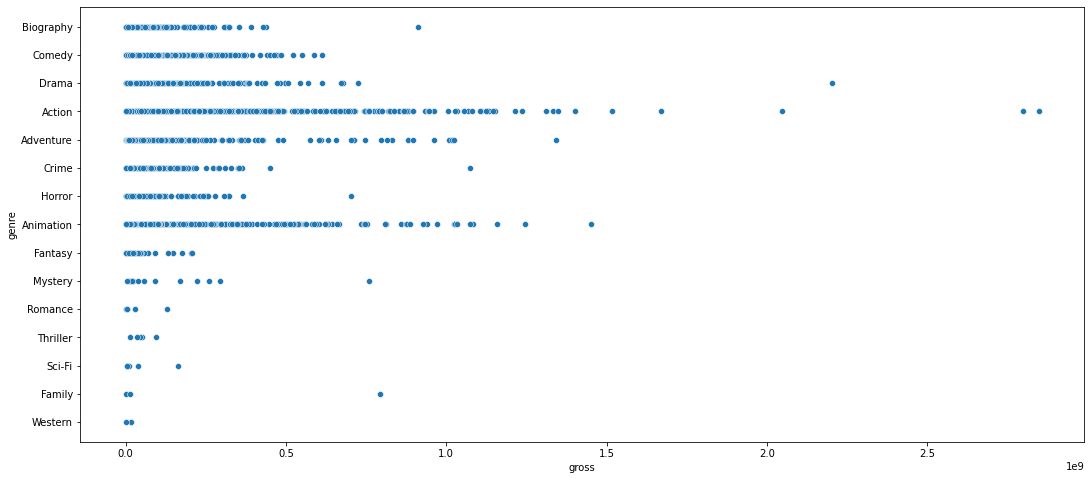

In [21]:
sns.scatterplot(data=df2, x="gross", y="genre")

### Movie release over time

Movie releases in the period 1980 to 2020

<AxesSubplot:xlabel='year'>

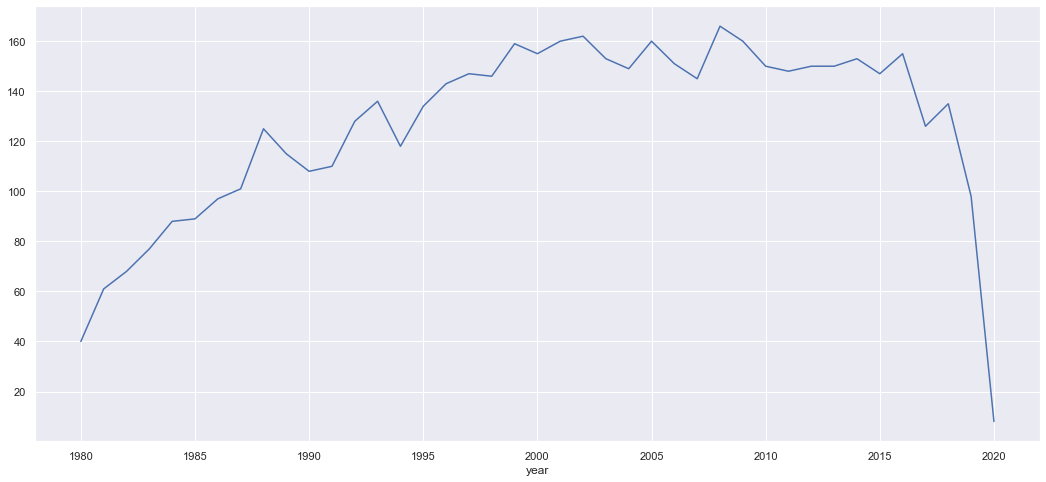

In [82]:
df2.groupby(['year']).count()['titleId'].plot()

We are also interested in what season there tend to have more movies released as an indication of the strength of compeition at different times of the year

In [98]:
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

<AxesSubplot:xlabel='month', ylabel='year'>

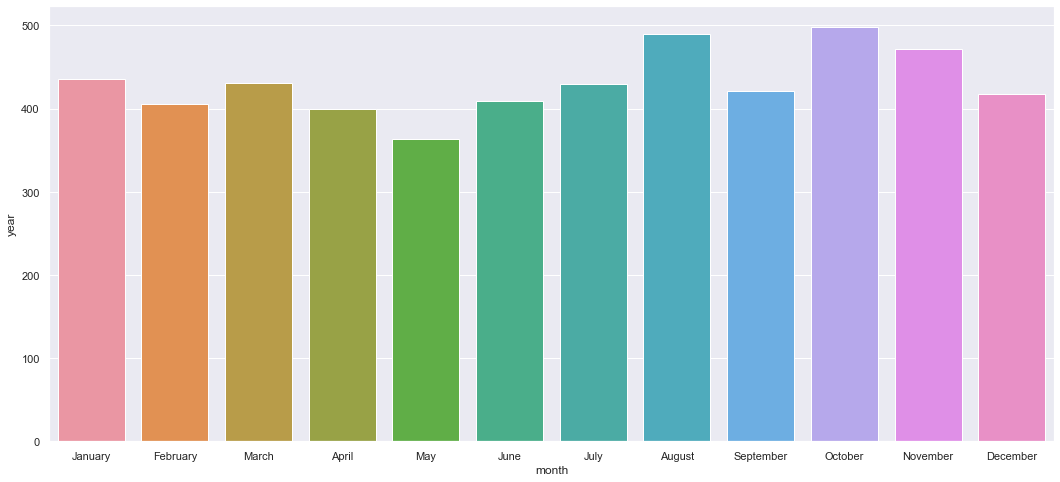

In [101]:
df_month = df2.groupby('month').count().reset_index()
sns.barplot(x = "month", y = "year",data = df_month, order = months )

comments

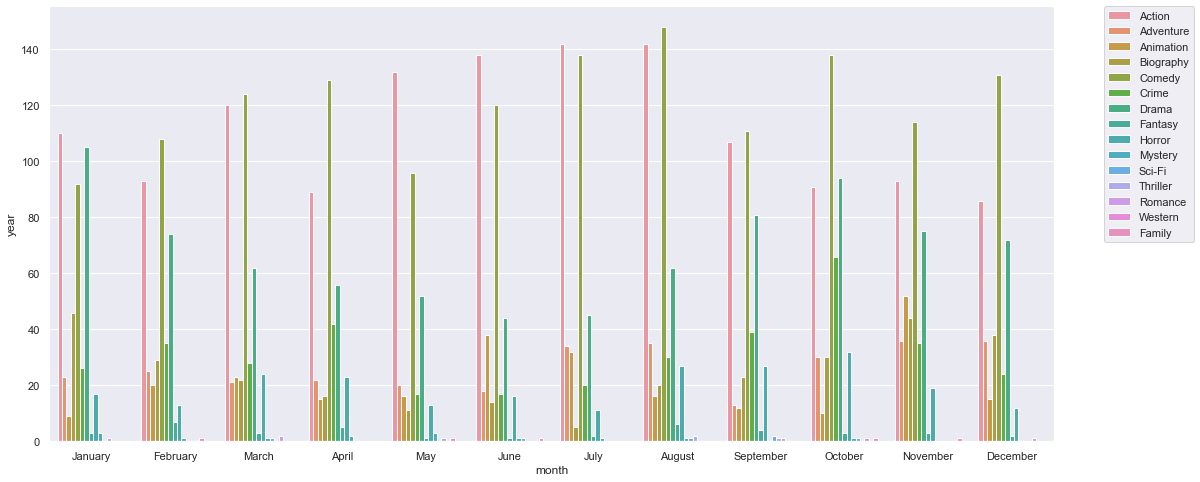

In [110]:
df2.groupby(['month','genre']).count()

df_month_genre = df2.groupby(['month','genre']).count().reset_index()
sns.barplot(x = "month", y = "year", hue = 'genre', data = df_month_genre, order = months )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='nr_cast', ylabel='Count'>

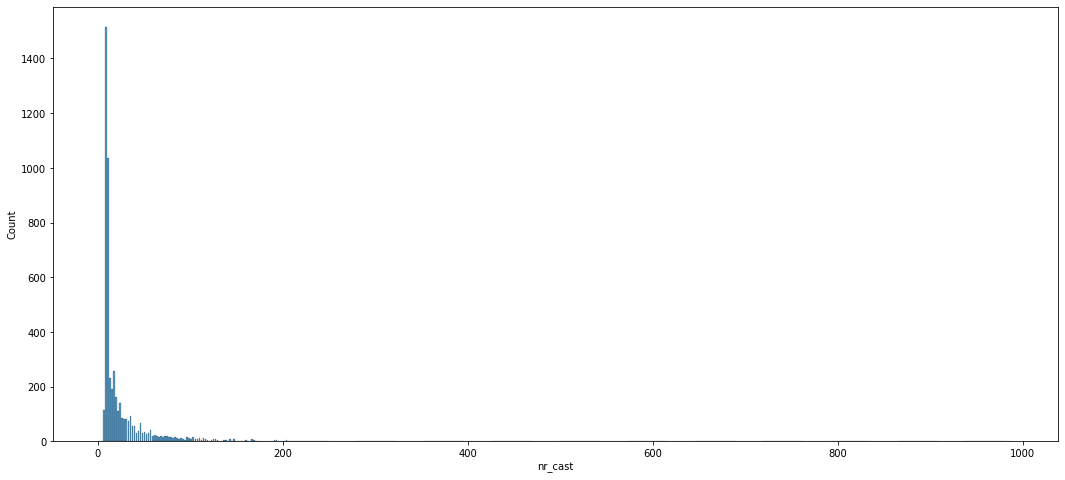

In [37]:
# amount of production people pr. movie 
df2['nr_cast'] = df2['category'].apply(lambda x: len(x.keys()))
df2
sns.histplot(data=df2, x="nr_cast",shrink=.8)


<AxesSubplot:xlabel='profit', ylabel='Count'>

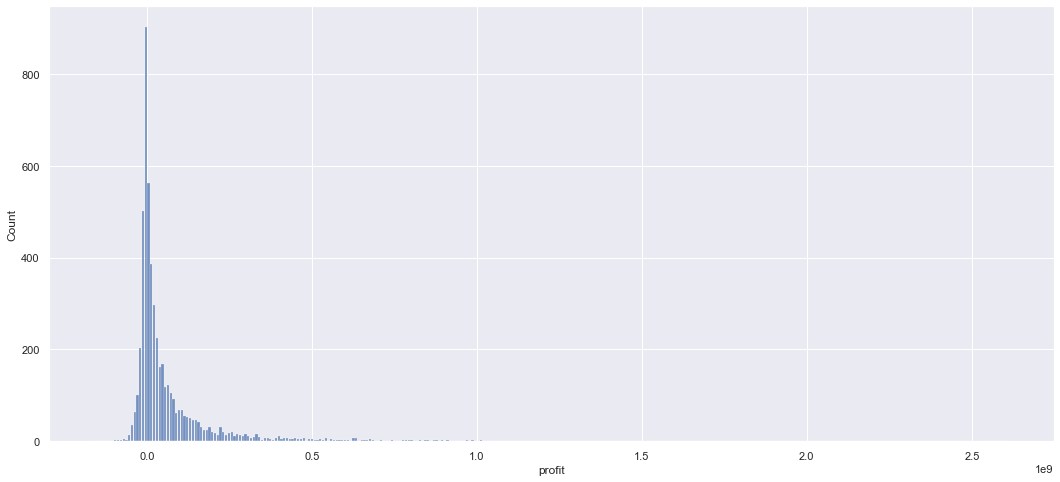

In [47]:
# create a column for profit wich is computed by gross - budget
df2['profit'] = df2['gross'] - df2['budget']
sns.histplot(data=df2, x="profit",shrink=.8)

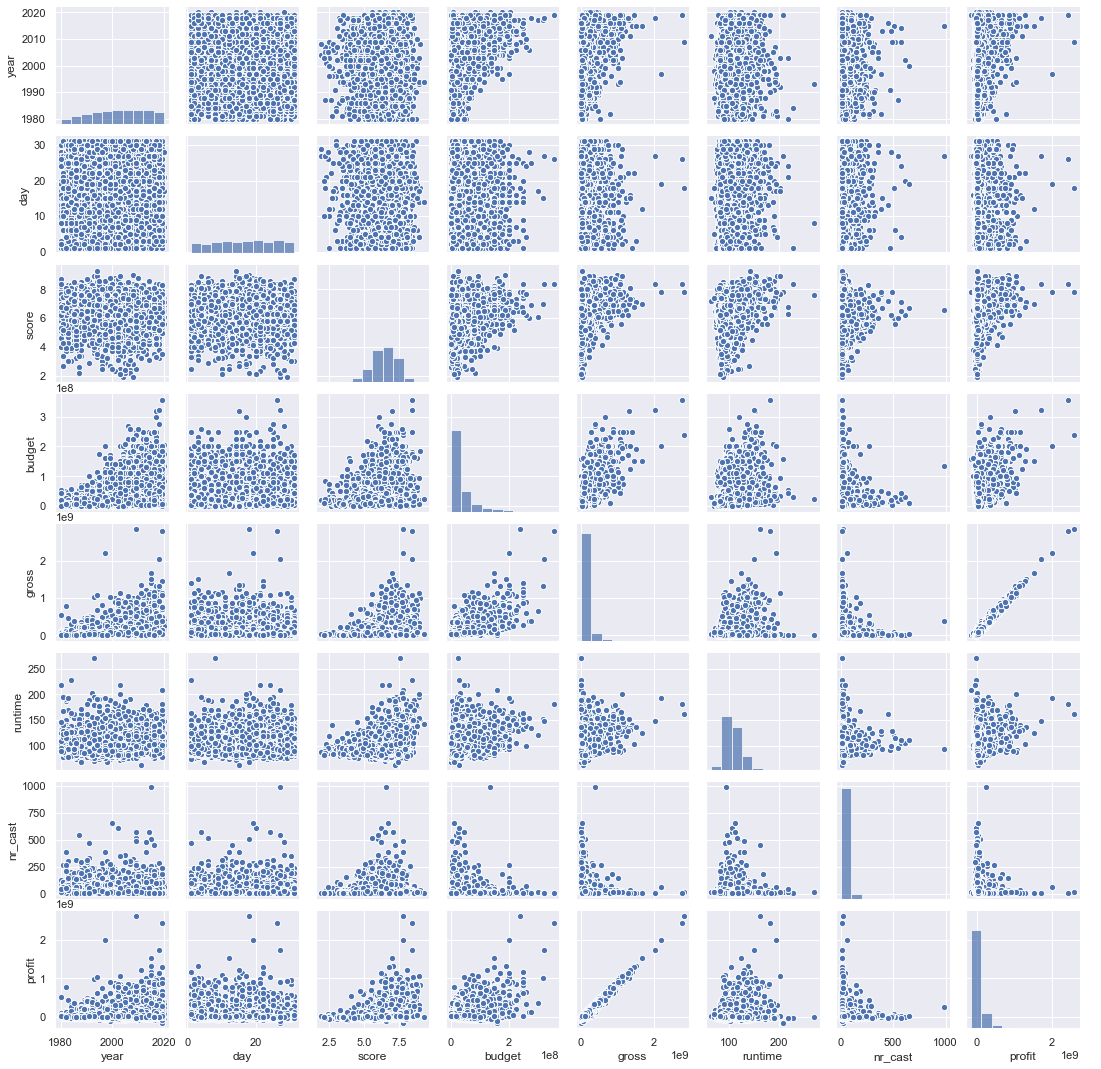

In [48]:
sns.set()

g = sns.PairGrid(df2)
g.fig.set_size_inches(15, 15)
g = g.map_diag(plt.hist, edgecolor = 'w', alpha = 0.7)
g = g.map_offdiag(plt.scatter, edgecolor = "w", s = 40)
g = g.add_legend()

sns.set()

In [49]:
normalized_df=(df2-df2.mean())/df2.std()

---
<a id='ending'></a>
## Part 5: _<u>Conclusion</u>_